In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import pandas as pd #For data related tasks
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from tempfile import mkdtemp

In [5]:
X_train = pd.read_csv('data/X_train_tfidf.csv', index_col=0) 
X_val = pd.read_csv('data/X_val_tfidf.csv', index_col=0) 
X_test = pd.read_csv('data/X_test_tfidf.csv', index_col=0) 

y_train = pd.read_csv('data/y_train.csv', index_col=0) 
y_val = pd.read_csv('data/y_val.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0)

In [6]:
X_train.head()

,index,year,cylinders,odometer,lat,long,posting_weekday,posting_month,posting_year,condition_excellent,...,d_wheel,d_white,d_window,d_wiper,d_without,d_won’t,d_work,d_year,d_youdisclaimer,d_✅
0,322098,2017.0,8,74863.0,45.519861,-122.434111,3,11,2020,0,...,0.067461,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,344532,2019.0,4,4142.0,41.400000,-75.660000,1,11,2020,0,...,0.000000,0.0,0.0,0.0,0.059981,0.039182,0.027457,0.0,0.039394,0.0
2,13565,2013.0,4,61674.0,34.620000,-112.420000,3,11,2020,0,...,0.000000,0.0,0.0,0.0,0.075885,0.049570,0.034738,0.0,0.049839,0.0
3,334734,2017.0,6,26451.0,40.270000,-76.880000,4,11,2020,0,...,0.000000,0.0,0.0,0.0,0.075588,0.049377,0.034602,0.0,0.049645,0.0
4,36265,2019.0,4,4161.0,33.779214,-84.411811,1,12,2020,0,...,0.000000,0.0,0.0,0.0,0.073911,0.048281,0.033834,0.0,0.048543,0.0


In [7]:
y_train

,price
322098,61900
344532,17990
13565,13590
334734,30990
36265,33990
...,...
431909,10595
287631,9999
325116,21488
174328,8995


In [8]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [9]:
X_train.drop(['index'], axis = 1, inplace = True)
X_val.drop(['index'], axis = 1, inplace = True)
X_test.drop(['index'], axis = 1, inplace = True)

In [10]:
index = X_train.columns
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

In [11]:
#analyzing shape to find if there any discrepancy before starting to model
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}') 
print(f'y_test Shape: {y_test.shape}') 
print(f'X_val Shape: {X_val.shape}') 
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (204156, 795)
y_train Shape: (204156,)
X_test Shape: (63799, 795)
y_test Shape: (63799,)
X_val Shape: (51039, 795)
y_val Shape: (51039,)


In [12]:
# Instantiate model & fit the DTR
t0 = perf_counter()
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)


dtr_predict = dtr_model.predict(X_val)

dtr_r2 = dtr_model.score(X_val,y_val)
dtr_mse = mean_squared_error(y_val, dtr_predict)
dtr_mae = mean_absolute_error(y_val, dtr_predict)
dtr_rmse = sqrt(mean_squared_error(y_val, dtr_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[dtr_r2], 'mae':[dtr_mae],'rmse':[dtr_rmse], 'mse': [dtr_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Decision Tree Regression with tfidf']))


# Evaluate
print(f"Decision Tree Regressor R2 score for train set: {dtr_model.score(X_train, y_train)}")
print(f"Decision Tree Regressor R2 score for val set:  {dtr_model.score(X_val,y_val)}")
print(f"Decision Tree Regressor MAE for val set: {dtr_mae}")
print(f"Decision Tree Regressor RMSE for val set: {dtr_rmse}" )
print(f"Decision Tree Regressor MSE for val set: {dtr_mse}")
print(f"Decision Tree Regressor runtime: {time_taken/60}")

Decision Tree Regressor R2 score for train set: 1.0
Decision Tree Regressor R2 score for val set:  0.8873645292449355
Decision Tree Regressor MAE for val set: 1857.6896294990106
Decision Tree Regressor RMSE for val set: 4264.484988036646
Decision Tree Regressor MSE for val set: 18185832.213189915
Decision Tree Regressor runtime: 1.5194227416664945


Scoring Matrices

Mean Absolute Error (MAE) is a measure of errors between paired observations. It is thus an arithmetic average of the absolute errors, which is th most important error rate for price prediction and we would give priorirty to this on R2 score
R-Squared value or The Coefficient of Determination
And for plain vanila Decision Tree model the error rate is 1857.6 and R2 on validation set is 0.887

Other matices for error rate for understanding purpose of readers

Mean Squared Error (MSE) - penalizing the model for larger magnitude errors (Another way to interpret MSE is, Variance of error values(How widely dispersed errors are)!)

Root Mean Squared Error - RMSE is standard deviation of errors

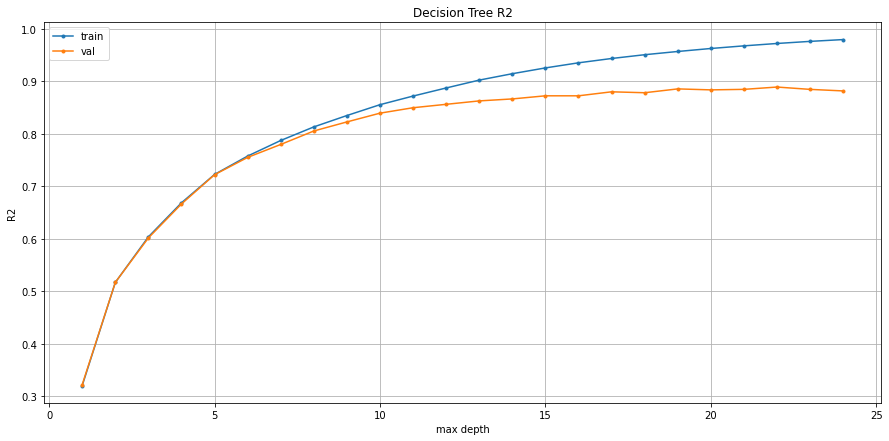

In [13]:
#Finding optimal max depth value
#Fit to the training data
#create some lists

train_accs = []
val_accs = []
depth_value = list(range(1,25))


# set up the loop
for i in depth_value:
    my_dt = DecisionTreeRegressor(max_depth=i)
    my_dt.fit(X_train,y_train)
    
    # append to lists
    train_accs.append(my_dt.score(X_train,y_train))
    val_accs.append(my_dt.score(X_val,y_val))
    

plt.figure(figsize=(15,7)) # plot classifier results
plt.plot(depth_value, train_accs, label='train', marker='.')
plt.plot(depth_value, val_accs , label='val', marker='.')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('R2')
plt.grid(True)
plt.title('Decision Tree R2')
plt.show()

In [17]:
#Fitting the model with optimal value of 17'max_depth'
#Fit to the training data
t0 = perf_counter()
dtr17_model = DecisionTreeRegressor(max_depth=17)
dtr17_model.fit(X_train, y_train)

dtr17_predict = dtr17_model.predict(X_val)


dtr17_r2 = dtr17_model.score(X_val,y_val)
dtr17_mse = mean_squared_error(y_val, dtr17_predict)
dtr17_mae = mean_absolute_error(y_val, dtr17_predict)
dtr17_rmse = sqrt(mean_squared_error(y_val, dtr17_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[dtr17_r2], 'mae':[dtr17_mae],'rmse':[dtr17_rmse], 'mse': [dtr17_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Decision Tree Regressor max_depth of 18 with tfidf']))


# Evaluate
print(f"Decision Tree Regressor max_depth 18 R2 score for train set: {dtr17_model.score(X_train, y_train)}")
print(f"Decision Tree Regressor max_depth 18 R2 score for val set:  {dtr17_model.score(X_val,y_val)}")
print(f"Decision Tree Regressor max_depth 18 MAE for val set: {dtr17_mae}")
print(f"Decision Tree Regressor max_depth 18 RMSE for val set: {dtr17_rmse}" )
print(f"Decision Tree Regressor max_depth 18 MSE for val set: {dtr17_mse}")
print(f"Decision Tree Regressor max_depth 18 Model runtime: {time_taken/60}")

Decision Tree Regressor max_depth 18 R2 score for train set: 0.9437102874172412
Decision Tree Regressor max_depth 18 R2 score for val set:  0.8770635660744142
Decision Tree Regressor max_depth 18 MAE for val set: 2422.1938634568714
Decision Tree Regressor max_depth 18 RMSE for val set: 4455.22155713956
Decision Tree Regressor max_depth 18 MSE for val set: 19848999.123201046
Decision Tree Regressor max_depth 18 Model runtime: 0.8530316933332264


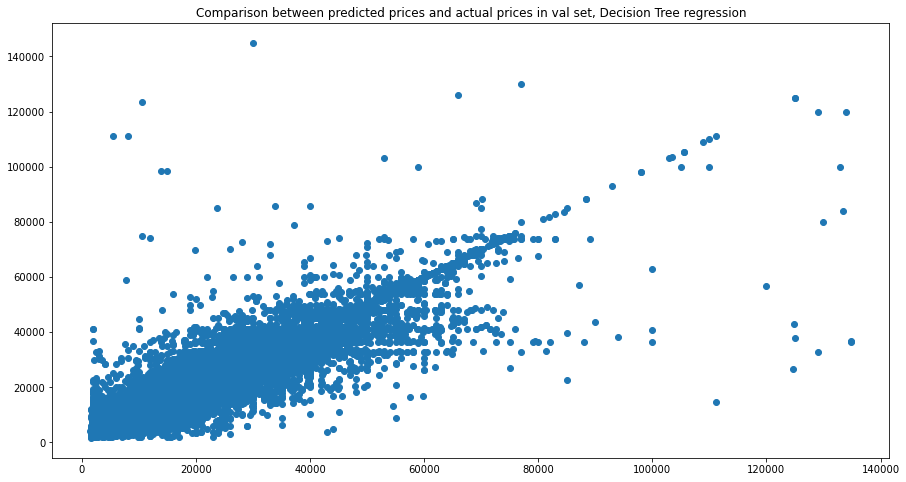

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Comparison between predicted prices and actual prices in val set, Decision Tree regression')
plt.scatter(y_val, dtr17_predict)

The first parameter for decision tree model was to tune max_depth. This parameter indicates how deep we want our tree to be. As initially tree was deep, it means we were creating a large number of splits in the parameter space and capturing more information about underlying train data. Where we observed R2 score of 1.0 indicating overfitting in training data and out model was having  R2 score for val data which was higher difference. That resulted in low training error but a large val/testing error.

On the other hand, if the tree was too shallow, we may run into underfitting, i.e. we would not have our tree learn enough information about the data and the accuracy of model stays low for both val/test and training samples. Hence, We fit a decision tree with depths ranging from 1 to 25 and plot the training and test.


In above plt, we see that as the tree depth increases, our validation/test accuracy starts to stabilize after a depth of around 20. But with even greater depths, the training accuracy keeps on rising , as the model learns more information from the data , but this can not be mapped onto unseen data, hence the validation accuracy stays stable. Finding the sweet spot (max depth=17) in this case would be the first hyper parameter that we tuned. 

In [23]:
#setup directory to cache pipeline results
cachedir=mkdtemp()

In [24]:
#Decision Tree
#selected max depth of 10 and now cross validation throuigh Grid Search via pipeline 

my_dt_pipeline = Pipeline(steps=[('model', DecisionTreeRegressor())], memory=cachedir)

#parameter grid
dt_param_grid = [
    #Linear Regression
    {'model':[DecisionTreeRegressor(max_depth=17)],
     'model__min_samples_leaf': [2, 3, 4, 5],
     'model__min_samples_split':[2,5,10,25],
     'model__max_features':['auto', 'sqrt', 'log2'],
     'model__random_state': [42]
     }
]
dt_gs = GridSearchCV(estimator=my_dt_pipeline, param_grid=dt_param_grid, cv=5,n_jobs=-1, verbose=3)

In [25]:
t0 = perf_counter()
fitted_dt = dt_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_dt = t1 - t0

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 35.0min finished


In [42]:
dt_predict = fitted_dt.predict(X_val)

dt_r2 = dt_gs.score(X_val,y_val)
dt_mse = mean_squared_error(y_val, dt_predict)
dt_mae = mean_absolute_error(y_val, dt_predict)
dt_rmse = sqrt(mean_squared_error(y_val, dt_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Decition Tree optimized R2 score for train set: {dt_gs.score(X_train, y_train)}")
print(f"Decition Tree optimized R2 score for val set:  {dt_gs.score(X_val,y_val)}")
print(f"Decition Tree optimized MAE for val set: {dt_mae}")
print(f"Decition Tree optimized RMSE for val set: {dt_rmse}" )
print(f"Decition Tree optimized MSE for val set: {dt_mse}")
print(f"Decition Tree optimized runtime: {time_taken_dt/60}")
print(f"Decition Tree optimized Parameters: {fitted_dt.best_estimator_}")

Decition Tree optimized R2 score for train set: 0.9311042924850221
Decition Tree optimized R2 score for val set:  0.8847930203147126
Decition Tree optimized MAE for val set: 2440.400385552329
Decition Tree optimized RMSE for val set: 4312.890145114568
Decition Tree optimized MSE for val set: 18601021.403826367
Decition Tree optimized runtime: 65.49621948999993
Decition Tree optimized Parameters: Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmp5num00jh',
         steps=[('model',
                 DecisionTreeRegressor(max_depth=17, max_features='auto',
                                       min_samples_leaf=5, random_state=42))])


After optimizing Decision Tree model we got MAE on validation set as 2440 and R2 as 0.88.

Optimal decision tree model was found through Grid SearchCV and optimal paramters are max_depth=17, max_features='auto', min_samples_leaf=5, random_state=42

### Random Forest 

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". 


Random Forest Regression in Python


Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. For our regression the final output would be average of all decisoin tree which is part of Aggregation

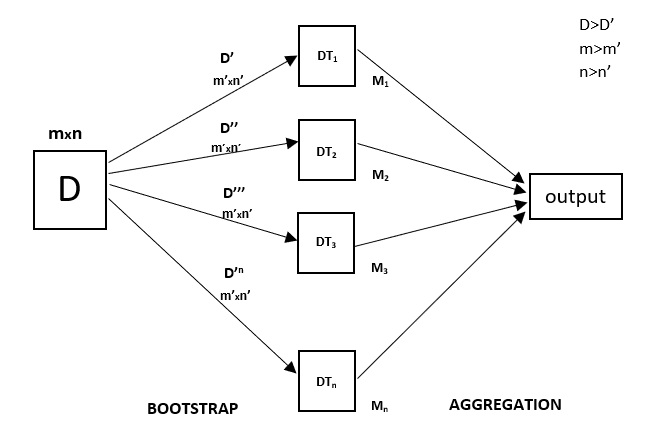


Each Decision tree will do is take the average of all true y of each leaf (the node that doesn't have anymore splits) as the estimated y-hat for that particular path, so that when you predict your val/test dataset, each record from that test dataset will basically follow some path down the tree until it hits a leaf node, and the estimated y-hat for that record will be the average true y of all observations in that leaf node.

A random forest is basically a collection of decision trees which use a subset of your training data to do the training. These trees are usually not as deep as a single decision tree model, which helps alleviate the overfitting symptoms of a single decision tree. The idea of a RF is that you're using many weak learners that can generalize your data well. Hence, less overfit.

The R-squared metric is basically 1 - (SS_res / SS_tot). Breaking that formula down, you're basically looking at the sum of squared residuals and the sum of squared total. Therefore, you just have to know the true y values, the estimated y-hat values, and the mean of the true y values, y-bar.

In [27]:
from sklearn.ensemble import RandomForestRegressor 

In [43]:
 # create regressor object 
rfr_model = RandomForestRegressor() 
  
# fit the regressor with x and y data 
rfr_model.fit(X_train, y_train)

rfr_predict = rfr_model.predict(X_val)

rfr_r2 = metrics.r2_score(y_val, rfr_predict)
rfr_rmse = math.sqrt(metrics.mean_squared_error(y_val, rfr_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'rmse':[rfr_rmse]}, index = ['Random Forest Regressor']))


rfr_r2 = rfr_model.score(X_val,y_val)
rfr_mse = mean_squared_error(y_val, rfr_predict)
rfr_mae = mean_absolute_error(y_val, rfr_predict)
rfr_rmse = sqrt(mean_squared_error(y_val, rfr_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'mae':[rfr_mae],'rmse':[rfr_rmse], 'mse': [rfr_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Random Forest Regressor with tfidf']))



# Evaluate
print(f"Random Forest Regressor R2 score for train set: {rfr_model.score(X_train, y_train)}")
print(f"Random Forest Regressor R2 score for val set:  {rfr_model.score(X_val,y_val)}")
print(f"Random Forest Regressor MAE for val set: {rfr_mae}")
print(f"Random Forest Regressor RMSE for val set: {rfr_rmse}" )
print(f"Random Forest Regressor MSE for val set: {rfr_mse}")
print(f"Random Forest Regressor Model runtime: {time_taken/60}")

Random Forest Regressor R2 score for train set: 0.9910552205858965
Random Forest Regressor R2 score for val set:  0.9416054499547023
Random Forest Regressor MAE for val set: 1465.0587035404296
Random Forest Regressor RMSE for val set: 3070.542824847697
Random Forest Regressor MSE for val set: 9428233.239223674
Random Forest Regressor Model runtime: 564.4815175183334


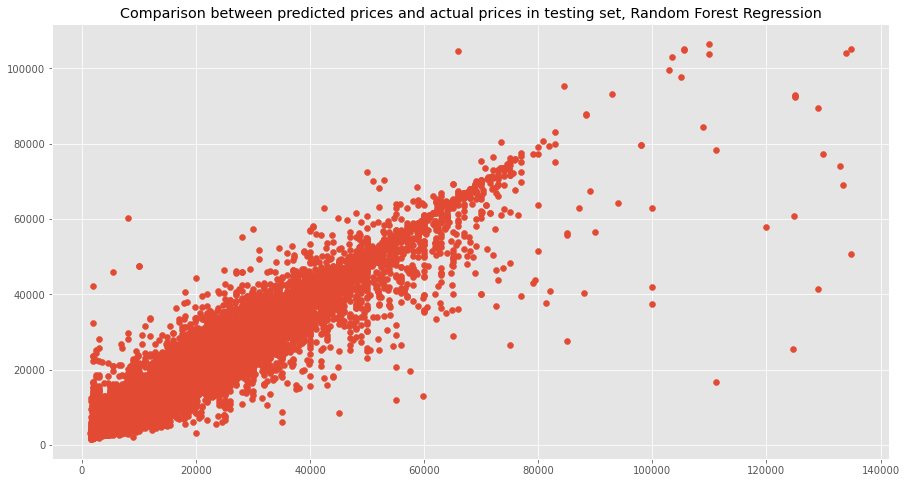

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Random Forest Regression')
plt.scatter(y_val, rfr_predict)

It can be observed that MAE and R2 scores immediately increase while implementing Random Forest model to 0.9461 and 1465 which is significant improvement

In [45]:
model_score

,r2,mae,rmse,mse,run_time
Decision Tree Regression with tfidf,0.887365,1857.689629,4264.484988,1.818583e+07,1.519423
Decision Tree Regressor max_depth of 18 with tfidf,0.883188,2329.245715,4342.824656,1.886013e+07,0.874273
Decision Tree Regressor max_depth of 18 with tfidf,0.877064,2422.193863,4455.221557,1.984900e+07,0.853032
Random Forest Regressor with tfidf,0.942012,1459.181151,3059.847202,9.362665e+06,145.928734
Random Forest Regressor with tfidf on test data,0.936363,1488.603425,3207.449334,1.028773e+07,146.593166
Random Forest Regressor with tfidf,0.941605,1465.058704,3070.542825,9.428233e+06,564.481518


In [46]:
importance = rfr_model.feature_importances_

In [47]:
Coef_df = pd.DataFrame(importance, index=index.values, columns=['importance'])

In [48]:
Coef_df.head(5)

,importance
year,0.368756
cylinders,0.198084
odometer,0.076011
lat,0.002045
long,0.004072


In [49]:
Coef_df.sort_values(by='importance', ascending=False).head(20)

,importance
year,0.368756
cylinders,0.198084
odometer,0.076011
fuel_diesel,0.057964
d_2014,0.042942
drive_fwd,0.032787
drive_4wd,0.015405
d_turbo,0.006781
car_model_chevrolet corvette,0.006270
car_model_jeep wrangler,0.005823


In [50]:
imp=Coef_df.sort_values(by='importance', ascending=False).head(20)

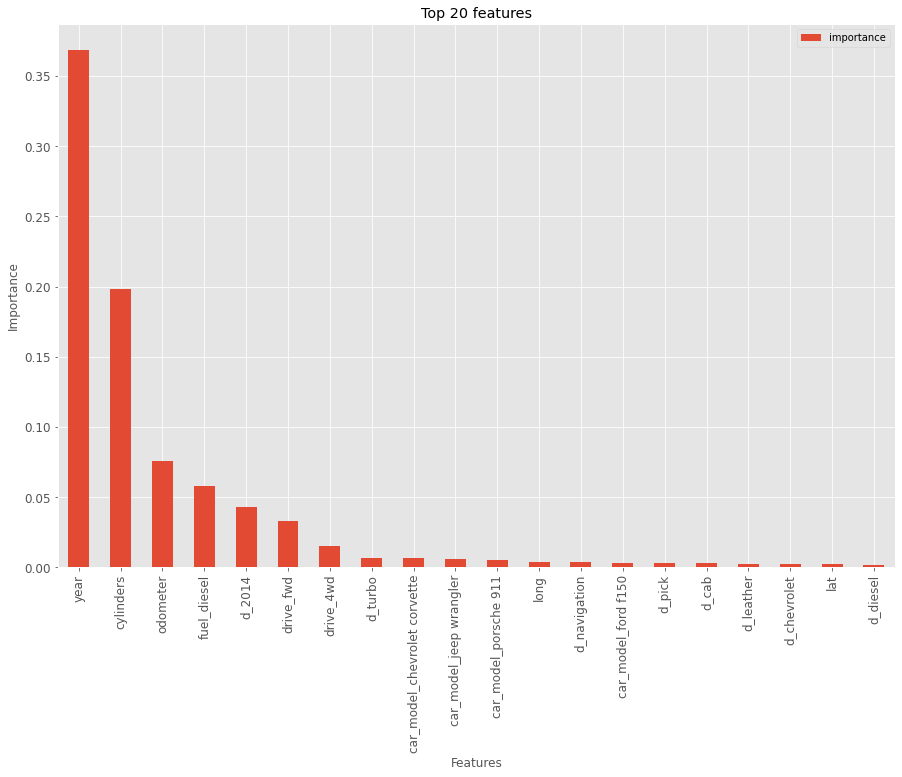

In [51]:
import pandas as pd
import matplotlib.pyplot as plt  


plt.style.use('ggplot')
ax = imp[['importance']].plot(kind='bar', title ="Top 20 features",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Features",fontsize=12)
ax.set_ylabel("Importance",fontsize=12)
plt.show()

Top 20 important features are plotted above and it is pertinent to note that year of vehicle model is the single most important feture followed by number of cylinders and odometer reading. Also, result of natural language process provides us with columns starting with d_ which are 2014, fwd, 4wd, turbo, navigation, pick, cab, leather, diesel indicating that these words if found in description column provides significance in determining price of a vehicle.

In [53]:
rfrt_predict = rfr_model.predict(X_test)

rfrt_r2 = metrics.r2_score(y_test, rfrt_predict)
rftr_rmse = math.sqrt(metrics.mean_squared_error(y_test, rfrt_predict))

In [54]:
rfrt_predict = rfr_model.predict(X_test)

rfrt_r2 = metrics.r2_score(y_test, rfrt_predict)
rftr_rmse = math.sqrt(metrics.mean_squared_error(y_test, rfrt_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'rmse':[rfr_rmse]}, index = ['Random Forest Regressor']))


rfrt_r2 = rfr_model.score(X_test,y_test)
rfrt_mse = mean_squared_error(y_test, rfrt_predict)
rfrt_mae = mean_absolute_error(y_test, rfrt_predict)
rfrt_rmse = sqrt(mean_squared_error(y_test, rfrt_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[rfrt_r2], 'mae':[rfrt_mae],'rmse':[rfrt_rmse], 'mse': [rfrt_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Random Forest Regressor with tfidf on test data']))



# Evaluate
print(f"Random Forest Regressor R2 score for train set: {rfr_model.score(X_train, y_train)}")
print(f"Random Forest Regressor R2 score for val set:  {rfr_model.score(X_test,y_test)}")
print(f"Random Forest Regressor MAE for val set: {rfrt_mae}")
print(f"Random Forest Regressor RMSE for val set: {rfrt_rmse}" )
print(f"Random Forest Regressor MSE for val set: {rfrt_mse}")
print(f"Random Forest Regressor Model runtime: {time_taken/60}")

Random Forest Regressor R2 score for train set: 0.9910552205858965
Random Forest Regressor R2 score for val set:  0.9366284194651835
Random Forest Regressor MAE for val set: 1488.8844401949875
Random Forest Regressor RMSE for val set: 3200.7445292482626
Random Forest Regressor MSE for val set: 10244765.541512681
Random Forest Regressor Model runtime: 564.9643153716667


In [55]:
model_score

,r2,mae,rmse,mse,run_time
Decision Tree Regression with tfidf,0.887365,1857.689629,4264.484988,1.818583e+07,1.519423
Decision Tree Regressor max_depth of 18 with tfidf,0.883188,2329.245715,4342.824656,1.886013e+07,0.874273
Decision Tree Regressor max_depth of 18 with tfidf,0.877064,2422.193863,4455.221557,1.984900e+07,0.853032
Random Forest Regressor with tfidf,0.942012,1459.181151,3059.847202,9.362665e+06,145.928734
Random Forest Regressor with tfidf on test data,0.936363,1488.603425,3207.449334,1.028773e+07,146.593166
Random Forest Regressor with tfidf,0.941605,1465.058704,3070.542825,9.428233e+06,564.481518
Random Forest Regressor with tfidf on test data,0.936628,1488.884440,3200.744529,1.024477e+07,564.964315


### Hyperparameter tuning using grid search with k-fold cross-validation
we use a procedure called k-fold cross-validation where k is the number of folds (which is usually 5 or 10). 

In k-fold cross-validation,
 -  first divide the original dataset into the train set and test set using train_test_split() function.
 - The train set is further divided into k-number of folds.
 - The model is trained using k−1 of the folds and validated on the remaining fold.
 - The process is done k times and the performance measure is reported at each execution. Then it takes the average.
 - After finding the parameters, the final evaluation is done on the test set.
 - The following diagram illustrates the k-fold cross-validation procedure.
 
 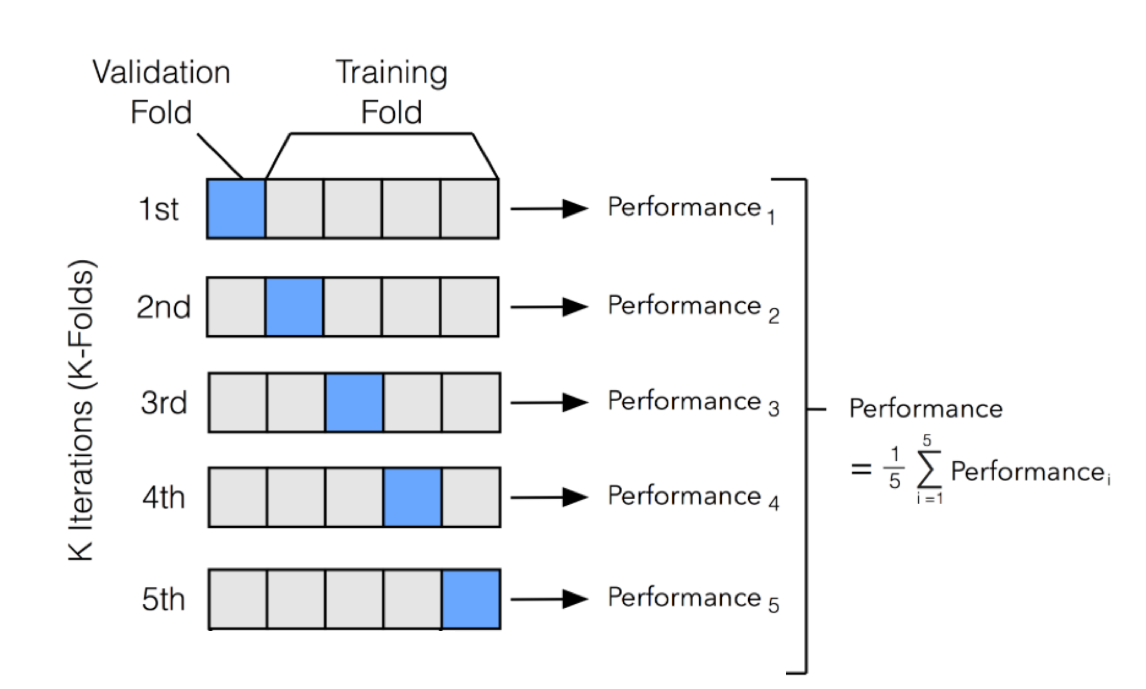

 
 
 Image from Scikit-learn official website: https://scikit-learn.org
 
 
 Tuning hyperparameters can be done using the Grid Search method along with k-fold cross-validation. The equivalent Scikit-learn function is GridSearchCV and Randomized Search. It finds all the hyperparameter combinations for a specified k number of folds. I opted for Randomized search due to the reason that Randomized Search is time efficient
 
 The randomized search and the grid search explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower.(https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
 
 
 

#hyperparameter optimization is time consuming for my models, hence i am reducing my dataset to 20% for hyperparameter optimization for decision tree model
from sklearn.model_selection import train_test_split

#Using train test split to have 50% of dataset
split = 0.5

X_train_sample, X_train_leftover, y_train_sample, y_train_leftover = train_test_split(X_train, y_train, test_size=split, random_state=35)

print(X_train_sample.shape, y_train_sample.shape)
print(X_train_leftover.shape, y_train_leftover.shape)

In [61]:
#GRID SEARCH

my_rf_pipeline = Pipeline(steps=[('model', RandomForestRegressor())], memory=cachedir)

#parameter grid
rf_param_grid = [
    #Linear Regression
    {'model':[RandomForestRegressor()],
     'model__n_estimators':[150,200],
     'model__random_state': [1]
     }
]
rf_gs = GridSearchCV(estimator=my_rf_pipeline, param_grid=rf_param_grid, cv=5,n_jobs=-1, verbose=3)

In [62]:
t0 = perf_counter()
fitted_rf = rf_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_rf = t1 - t0

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 404.5min remaining: 943.8min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 405.1min remaining: 173.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 450.0min finished


In [ ]:
my_rf_pipeline.get_params().keys()

In [63]:
rf_predict = fitted_rf.predict(X_val)


rf_r2 = rf_gs.score(X_val,y_val)
rf_mse = mean_squared_error(y_val, rf_predict)
rf_mae = mean_absolute_error(y_val, rf_predict)
rf_rmse = sqrt(mean_squared_error(y_val, rf_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Random Forest optimized R2 score for train set: {rf_gs.score(X_train, y_train)}")
print(f"Random Forest optimized R2 score for val set:  {rf_gs.score(X_val,y_val)}")
print(f"Random Forest optimizedDecition Tree MAE for val set: {rf_mae}")
print(f"Random Forest optimized RMSE for val set: {rf_rmse}" )
print(f"Random Forest optimized MSE for val set: {rf_mse}")
print(f"Random Forest optimized runtime: {time_taken_rf/60}")
print(f"Random Forest optimized Parameters: {fitted_rf.best_estimator_}")

Random Forest optimized R2 score for train set: 0.9913337530746843
Random Forest optimized R2 score for val set:  0.942309237784692
Random Forest optimizedDecition Tree MAE for val set: 1453.5666871412056
Random Forest optimized RMSE for val set: 3051.983203396107
Random Forest optimized MSE for val set: 9314601.473811962
Random Forest optimized runtime: 633.4885705483335
Random Forest optimized Parameters: Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmp5num00jh',
         steps=[('model',
                 RandomForestRegressor(n_estimators=200, random_state=1))])


In [ ]:
#GRID SEARCH

my_rf_pipeline = Pipeline(steps=[('model', RandomForestRegressor())], memory=cachedir)

#parameter grid
rf1_param_grid = [
    #Linear Regression
    {'model':[RandomForestRegressor()],
     #'model__max_depth': [15,20,25],
     'model__min_samples_split':[2,5,10,25],
     'model__max_features':['auto', 'sqrt', 'log2'],
     #'model__n_estimators':[150,200,250],
     'model__random_state': [1]
     }
]
rf1_gs = GridSearchCV(estimator=my_rf_pipeline, param_grid=rf1_param_grid, cv=5,n_jobs=-1, verbose=3)

In [ ]:
t0 = perf_counter()
fitted_rf1 = rf1_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_rf1 = t1 - t0

In [ ]:
rf1_predict = fitted_rf1.predict(X_val)


rf1_r2 = rf_gs.score(X_val,y_val)
rf1_mse = mean_squared_error(y_val, rf1_predict)
rf1_mae = mean_absolute_error(y_val, rf1_predict)
rf1_rmse = sqrt(mean_squared_error(y_val, rf1_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Decition Tree R2 score for train set: {rf1_gs.score(X_train, y_train)}")
print(f"Decition Tree R2 score for val set:  {rf1_gs.score(X_val,y_val)}")
print(f"Decition Tree MAE for val set: {rf1_mae}")
print(f"Decition Tree RMSE for val set: {rf1_rmse}" )
print(f"Decition Tree MSE for val set: {rf1_mse}")
print(f"Decition Tree runtime: {time_taken_rf1/60}")
print(f"Decition Tree Parameters: {fitted_rf1.best_estimator_}")

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
cachedir=mkdtemp()

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor())], memory=cachedir )

In [30]:
rdt1_param_grid = {#"model__criterion": ["mse", "mae"], 
                  #'model__max_depth': [18, 20, 22], 
                  #'model__max_features': ['auto', 'log2'], 
                  "model__min_samples_split" : [2,4],
                  'model__n_estimators': [100, 150],
                  'model__warm_start':['True'],
                  'model__ccp_alpha':[0, 0.05]}

In [31]:
estimator=my_pipeline
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__bootstrap', 'model__ccp_alpha', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

In [32]:
rs=RandomizedSearchCV(estimator, rdt1_param_grid, cv=5, n_jobs=-1, verbose=5)

In [33]:
fitted_rs=rs.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\zesha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 141.0min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed: 851.0min remaining: 150.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 939.3min finished


In [34]:
fitted_rs.best_estimator_

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpz0i7q_rz',
         steps=[('model',
                 RandomForestRegressor(ccp_alpha=0.05, n_estimators=150,
                                       warm_start='True'))])

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpz0i7q_rz',
         steps=[('model',
                 RandomForestRegressor(ccp_alpha=0.05, n_estimators=150,
                                       warm_start='True'))])

In [35]:
print(f"R2 on train set: {fitted_rs.score(X_train, y_train)}")
print(f"R2 on test set: {fitted_rs.score(X_val, y_val)}")

R2 on train set: 0.9912673581055097
R2 on test set: 0.9420562032560859


In [36]:
rdt2_param_grid = {#"model__criterion": ["mse", "mae"], 
                  #'model__max_depth': [18, 20, 22], 
                  #'model__max_features': ['auto', 'log2'], 
                  #"model__min_samples_split" : [2,4],
                  'model__n_estimators': [150, 200],
                  'model__warm_start':['True'],
                  'model__ccp_alpha':[0.05, 0.09]}

In [42]:
rs1=RandomizedSearchCV(estimator, rdt2_param_grid, cv=5, n_jobs=-1, verbose=5)

In [65]:
 # create regressor object 
rfr_model_op = RandomForestRegressor(ccp_alpha=0.05, n_estimators=200,
                                       warm_start='True') 
  
# fit the regressor with x and y data 
rfr_model_op.fit(X_train, y_train)

rfr_predict_op = rfr_model_op.predict(X_val)

rfr_r2_op = metrics.r2_score(y_val, rfr_predict_op)
rfr_rmse_op = math.sqrt(metrics.mean_squared_error(y_val, rfr_predict_op))

#model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'rmse':[rfr_rmse]}, index = ['Random Forest Regressor']))


rfr_r2_op = rfr_model_op.score(X_val,y_val)
rfr_mse_op = mean_squared_error(y_val, rfr_predict_op)
rfr_mae_op = mean_absolute_error(y_val, rfr_predict_op)
rfr_rmse_op = sqrt(mean_squared_error(y_val, rfr_predict_op))
t1 = perf_counter()
time_taken_op = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2_op], 'mae':[rfr_mae_op],'rmse':[rfr_rmse_op], 'mse': [rfr_mse_op],
                                               'run_time':[(time_taken_op)/60]} ,index = ['Random Forest Regressor optimized']))



# Evaluate
print(f"Random Forest Regressor optimized R2 score for train set: {rfr_model_op.score(X_train, y_train)}")
print(f"Random Forest Regressor optimized R2 score for val set:  {rfr_model_op.score(X_val,y_val)}")
print(f"Random Forest Regressor optimized MAE for val set: {rfr_mae_op}")
print(f"Random Forest Regressor optimized RMSE for val set: {rfr_rmse_op}" )
print(f"Random Forest Regressor optimized MSE for val set: {rfr_mse_op}")
print(f"Random Forest Regressor optimized Model runtime: {time_taken_op/60}")

Random Forest Regressor optimized R2 score for train set: 0.9912447859499288
Random Forest Regressor optimized R2 score for val set:  0.9422128242928608
Random Forest Regressor optimized MAE for val set: 1450.6396937376705
Random Forest Regressor optimized RMSE for val set: 3054.5323941977363
Random Forest Regressor optimized MSE for val set: 9330168.147203356
Random Forest Regressor optimized Model runtime: 830.2900233783332


In [79]:
rfr_predict_opt = rfr_model_op.predict(X_test)

rfr_r2_opt = metrics.r2_score(y_test, rfr_predict_opt)
rfr_rmse_opt = math.sqrt(metrics.mean_squared_error(y_test, rfr_predict_opt))



rfr_r2_opt = rfr_model_op.score(X_test,y_test)
rfr_mse_opt = mean_squared_error(y_test, rfr_predict_opt)
rfr_mae_opt = mean_absolute_error(y_test, rfr_predict_opt)
rfr_rmse_opt = sqrt(mean_squared_error(y_test, rfr_predict_opt))
t1 = perf_counter()
time_taken_opt = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2_opt], 'mae':[rfr_mae_opt],'rmse':[rfr_rmse_opt], 'mse': [rfr_mse_opt],
     #                                          'run_time':[(time_taken_opt)/60]} ,index = ['Random Forest Regressor optimized score on test set']))
#


# Evaluate
print(f"Random Forest Regressor optimized R2 score for test set:  {rfr_model_op.score(X_test,y_test)}")
print(f"Random Forest Regressor optimized MAE for val set: {rfr_mae_opt}")
print(f"Random Forest Regressor optimized RMSE for val set: {rfr_rmse_opt}" )
print(f"Random Forest Regressor optimized MSE for val set: {rfr_mse_opt}")
print(f"Random Forest Regressor optimized Model runtime: {time_taken_opt/60}")

Random Forest Regressor optimized R2 score for test set:  0.9369618394229201
Random Forest Regressor optimized MAE for val set: 1480.300966520912
Random Forest Regressor optimized RMSE for val set: 3192.3133088265527
Random Forest Regressor optimized MSE for val set: 10190864.261711132
Random Forest Regressor optimized Model runtime: 879.3622931083335


Hyper paramter optimized for Random Forest are
ccp_alpha=0.05, n_estimators=200,warm_start='True'

And we found that val set resulted in R2 and MAE values of 0.9422 and 1450 which though are better then vanilla random forest model but we tested the model on unseen data from start our test set for which the values found were 0.9369 and 1480. Hence, it can be said the the predicted price +- 1480 would be the price range of used vehicle through our model as remember MAE is the measure of errors between paired observations, test predictions and test values.


In [ ]:
#model_score.to_csv('data/model_scores.csv', mode='a', index=False, header=False)

In [ ]:
#imp.to_csv('data/imp_features_tfidf.csv')